In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torchvision import datasets, transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: torch.flatten(x))
        ])

train = datasets.MNIST('./data/tr', train=True, transform=transform, download=True)
test = datasets.MNIST('./data/t', train=False, transform=transform, download=True)

trainloader = torch.utils.data.DataLoader(train, batch_size=32)
testloader = torch.utils.data.DataLoader(test, batch_size=32)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50698871.83it/s]


Extracting ./data/tr/MNIST/raw/train-images-idx3-ubyte.gz to ./data/tr/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1488171.77it/s]


Extracting ./data/tr/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/tr/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14193955.77it/s]


Extracting ./data/tr/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/tr/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2594379.51it/s]

Extracting ./data/tr/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/tr/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50190935.06it/s]


Extracting ./data/t/MNIST/raw/train-images-idx3-ubyte.gz to ./data/t/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1526946.17it/s]


Extracting ./data/t/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/t/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13572547.14it/s]


Extracting ./data/t/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/t/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1969250.44it/s]

Extracting ./data/t/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/t/MNIST/raw



In [4]:
#model
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.Sigmoid(),
            nn.Linear(256, 20),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(20, 256),
            nn.Sigmoid(),
            nn.Linear(256, 28*28),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x
    
class Autoenc(nn.Module):
    def __init__(self, enc, dec):
        super().__init__()
        self.enc = enc
        self.dec = dec
        
    def forward(self, x):
        x = self.enc(x)
        x = self.dec(x)
        return x
    
enc = Encoder()
dec = Decoder()

autoenc = Autoenc(enc, dec)

In [5]:
import numpy as np

#train autoenc
autoenc.to('cuda:0')
autoenc.train()
optimizer = torch.optim.Adam(autoenc.parameters(), lr=0.002)
lossfn = nn.MSELoss()

n_epochs = 2
for ep in range(n_epochs):
    train_loss = 0
    for idx, (data, label) in enumerate(trainloader):
        data = data.to('cuda:0')
        
        optimizer.zero_grad()
        output = autoenc(data)

        loss = lossfn(output.reshape(-1, 784), data.reshape(-1, 784))

        train_loss += loss.item()
        loss.backward()
        optimizer.step()


    print(f'Loss at epoch {ep}: {train_loss}')

Loss at epoch 0: 85.6611866503954
Loss at epoch 1: 48.6980963088572


In [6]:
print(len(train))
im = train[4000][0]
im = im.to('cuda:0')

enc.eval()
dec.eval()
rep = enc(im)
d = dec(rep)


60000


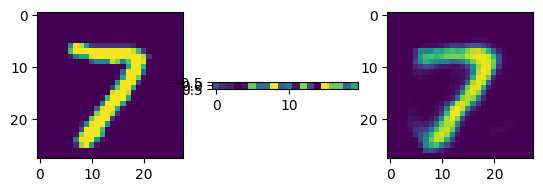

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(1,3,1)
plt.imshow(im.cpu().reshape(28, 28))
plt.subplot(1,3,2)
plt.imshow(rep.detach().cpu().reshape(1, -1))
plt.subplot(1,3,3)
plt.imshow(d.detach().cpu().reshape(28,28))
plt.show()
##http://www.eecs.qmul.ac.uk/~sgg/_ECS795P_/papers/WK07-8_PyTorch_Tutorial2.html

In [8]:
#yolo
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)

/opt/conda/lib/python3.10/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.1/755.1 kB 11.3 MB/s eta 0:00:00a 0:00:01
requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0

requirements: AutoUpdate success ✅ 16.0s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-3 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

100%|██████████| 40.8M/40.8M [00:00<00:00, 193MB/s] 

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


In [9]:
import cv2
image = cv2.cvtColor(cv2.imread('/kaggle/input/random-image/g.png'), cv2.COLOR_BGR2RGB)
pred = model(image)

In [10]:
pred = pred.pandas().xyxy[0]
pred = pred[['xmin', 'xmax', 'ymin', 'ymax']].to_numpy()
pred

array([[     606.08,      1265.6,       223.4,      905.53],
       [     1559.8,        1717,      815.19,      994.58]])

In [11]:
n = pred.shape[0]
pred = pred.astype(np.int32)
for i in range(n):
    cv2.rectangle(image, (pred[i,0], pred[i,2]), (pred[i,1], pred[i,3]), color=(255,0,0), thickness=2)
    
plt.imshow(image)

In [12]:
model
#https://colab.research.google.com/drive/1M7x59w0Immfq_eCTLHAF9EQpyvafItC9?usp=sharing

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
  